# Studi Kasus Corona Virus

#### Daniel Yoga Priyono

- Dataset dapat didownload menggunakan curl pada link berikut https://raw.githubusercontent.com/RamiKrispin/coronavirus/master/csv/coronavirus.csv
- Contoh Visualization dengan dataset yang sama yang dibuat oleh RamiKrispin menggunakan R (plotly.R dan flex-dashboard) : https://ramikrispin.github.io/coronavirus_dashboard/


**---------------------------------------------------------------------**
- Setiap kelompok dapat memilih untuk fokus menganalisa studi kasus Corona pada salah satu negara di bawah ini:

1. Indonesia
2. Germany
4. US
*hint* Setiap Kelompok harus memilih negara yang berbeda. Satu negara hanya untuk satu kelompok saja.

**---------------------------------------------------------------------**

- Setelah kalian memilih satu dari empat negara di atas, hasil akhir dari analisa kalian pada Corona Virus dataset, paling tidak harus menjawab beberapa pertanyaan di bawah ini:

1. Bagaimana perkembangan kasus Corona yang terkonfirmasi (confirmed) pada setiap tahunnya, dari 2020 hingga 2022? Visualisasikan!

2. Berapa presentase jumlah kasus yang terkonfirmasi (confirmed) dari jumlah populasi pada negara tersebut di setiap tahun yang sama? Visualisasikan!

3. Berapa presentase jumlah kasus kematian (death) dari jumlah kasus yang terkonfirmasi (confirmed) pada setiap tahunnya, dari 2020 hingga 2022? Visualisasikan!

3. Berapa presentase jumlah kasus yang sembuh ("recovery") dari jumlah kasus yang terkonfirmasi (confirmed) pada setiap tahunnya? Visualisasikan!

5. Kemudian, bandingkan antara presentase kasus kematian (point nomor 3) dengan presentase kasus yang sembuh (point nomor 4) dalam satu visualisasi.

6. Bandingkan jumlah perkembangan kasus Corona yang terkonfirmasi (confirmed) dari tahun ke tahun antara negara yang kalian pilih (Indonesia/Germany/China/US) dengan negara lain yang berada pada "continent" yang sama? Visualisasikan! 

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#!curl -O https://raw.githubusercontent.com/RamiKrispin/coronavirus/master/csv/coronavirus.csv

df = pd.read_csv("coronavirus.csv")
df.tail()

/var/folders/y8/1_hpl7ts5f120tzvtqqy1xyh0000gn/T/ipykernel_16017/3250483715.py:7: DtypeWarning:

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.



,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code
862219,2022-10-25,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
862220,2022-10-26,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
862221,2022-10-27,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
862222,2022-10-28,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
862223,2022-10-29,NaN,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862224 entries, 0 to 862223
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            862224 non-null  object 
 1   province        260084 non-null  object 
 2   country         862224 non-null  object 
 3   lat             857164 non-null  float64
 4   long            857164 non-null  float64
 5   type            862224 non-null  object 
 6   cases           862224 non-null  int64  
 7   uid             829840 non-null  float64
 8   iso2            817696 non-null  object 
 9   iso3            820732 non-null  object 
 10  code3           820732 non-null  float64
 11  combined_key    829840 non-null  object 
 12  population      813648 non-null  float64
 13  continent_name  820732 non-null  object 
 14  continent_code  673992 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 98.7+ MB


In [50]:
df.shape

(862224, 15)

In [51]:
df.columns

Index(['date', 'province', 'country', 'lat', 'long', 'type', 'cases', 'uid',
       'iso2', 'iso3', 'code3', 'combined_key', 'population', 'continent_name',
       'continent_code'],
      dtype='object')

In [52]:
df_clean = df.fillna(0)
df_clean

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code
0,2020-01-22,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,0
1,2020-01-23,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,0
2,2020-01-24,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,0
3,2020-01-25,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,0
4,2020-01-26,Alberta,Canada,53.933300,-116.576500,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862219,2022-10-25,0,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
862220,2022-10-26,0,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
862221,2022-10-27,0,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF
862222,2022-10-28,0,Zimbabwe,-19.015438,29.154857,recovery,0,716.0,ZW,ZWE,716.0,Zimbabwe,14862927.0,Africa,AF


In [53]:
df_bersih = df_clean.loc[:,["date", "country", "type", "cases", "population"]]
df_bersih


,date,country,type,cases,population
0,2020-01-22,Canada,confirmed,0,4413146.0
1,2020-01-23,Canada,confirmed,0,4413146.0
2,2020-01-24,Canada,confirmed,0,4413146.0
3,2020-01-25,Canada,confirmed,0,4413146.0
4,2020-01-26,Canada,confirmed,0,4413146.0
...,...,...,...,...,...
862219,2022-10-25,Zimbabwe,recovery,0,14862927.0
862220,2022-10-26,Zimbabwe,recovery,0,14862927.0
862221,2022-10-27,Zimbabwe,recovery,0,14862927.0
862222,2022-10-28,Zimbabwe,recovery,0,14862927.0


In [54]:
df_bersih["date"] = pd.to_datetime(df_bersih["date"], format = "%Y-%m-%d")
df_bersih.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862224 entries, 0 to 862223
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        862224 non-null  datetime64[ns]
 1   country     862224 non-null  object        
 2   type        862224 non-null  object        
 3   cases       862224 non-null  int64         
 4   population  862224 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 32.9+ MB


In [55]:
df_bersih["year"] = df_bersih["date"].dt.year
df_bersih


,date,country,type,cases,population,year
0,2020-01-22,Canada,confirmed,0,4413146.0,2020
1,2020-01-23,Canada,confirmed,0,4413146.0,2020
2,2020-01-24,Canada,confirmed,0,4413146.0,2020
3,2020-01-25,Canada,confirmed,0,4413146.0,2020
4,2020-01-26,Canada,confirmed,0,4413146.0,2020
...,...,...,...,...,...,...
862219,2022-10-25,Zimbabwe,recovery,0,14862927.0,2022
862220,2022-10-26,Zimbabwe,recovery,0,14862927.0,2022
862221,2022-10-27,Zimbabwe,recovery,0,14862927.0,2022
862222,2022-10-28,Zimbabwe,recovery,0,14862927.0,2022


In [56]:
Germany = df_bersih[df_bersih["country"]=="Germany"]
Germany

,date,country,type,cases,population,year
156860,2020-01-22,Germany,confirmed,0,83783945.0,2020
156861,2020-01-23,Germany,confirmed,0,83783945.0,2020
156862,2020-01-24,Germany,confirmed,0,83783945.0,2020
156863,2020-01-25,Germany,confirmed,0,83783945.0,2020
156864,2020-01-26,Germany,confirmed,0,83783945.0,2020
...,...,...,...,...,...,...
727623,2022-10-25,Germany,recovery,0,83783945.0,2022
727624,2022-10-26,Germany,recovery,0,83783945.0,2022
727625,2022-10-27,Germany,recovery,0,83783945.0,2022
727626,2022-10-28,Germany,recovery,0,83783945.0,2022


In [57]:
Germany_confirmed = Germany[Germany["type"]=="confirmed"]
Germany_confirmed

,date,country,type,cases,population,year
156860,2020-01-22,Germany,confirmed,0,83783945.0,2020
156861,2020-01-23,Germany,confirmed,0,83783945.0,2020
156862,2020-01-24,Germany,confirmed,0,83783945.0,2020
156863,2020-01-25,Germany,confirmed,0,83783945.0,2020
156864,2020-01-26,Germany,confirmed,0,83783945.0,2020
...,...,...,...,...,...,...
157867,2022-10-25,Germany,confirmed,94787,83783945.0,2022
157868,2022-10-26,Germany,confirmed,78905,83783945.0,2022
157869,2022-10-27,Germany,confirmed,61492,83783945.0,2022
157870,2022-10-28,Germany,confirmed,47718,83783945.0,2022


### 1.Bagaimana perkembangan kasus Corona yang terkonfirmasi (confirmed) pada setiap tahunnya, dari 2020 hingga 2022? Visualisasikan!

In [58]:
import matplotlib.pyplot as plt

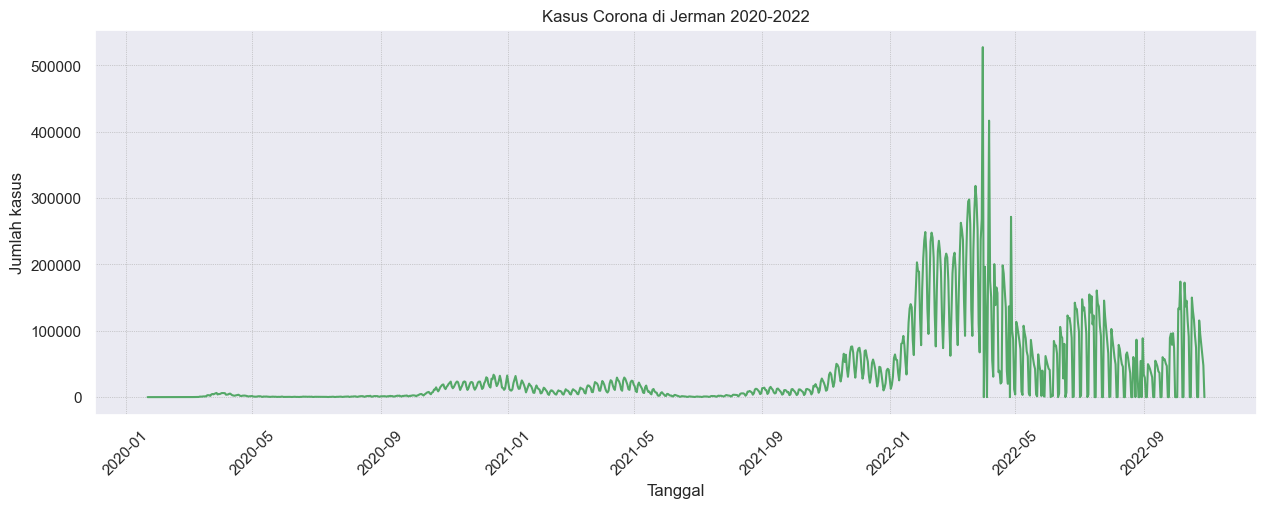

In [59]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(Germany_confirmed["date"], Germany_confirmed["cases"],
        color= 'g',     
        linestyle= '-') 

ax.set_xlabel("Tanggal") 
ax.set_ylabel("Jumlah kasus") 
ax.set_title("Kasus Corona di Jerman 2020-2022")
plt.grid(color='darkgray', linestyle='dotted', linewidth=0.5)

plt.xticks(rotation = 45)

plt.show()


In [60]:
import seaborn as sns

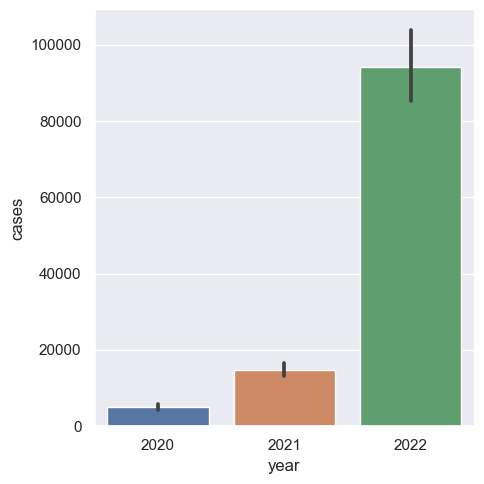

In [61]:
sns.catplot(x = "year", y = "cases", data = Germany_confirmed, kind = "bar" )

plt.show()

<Axes: xlabel='date', ylabel='cases'>

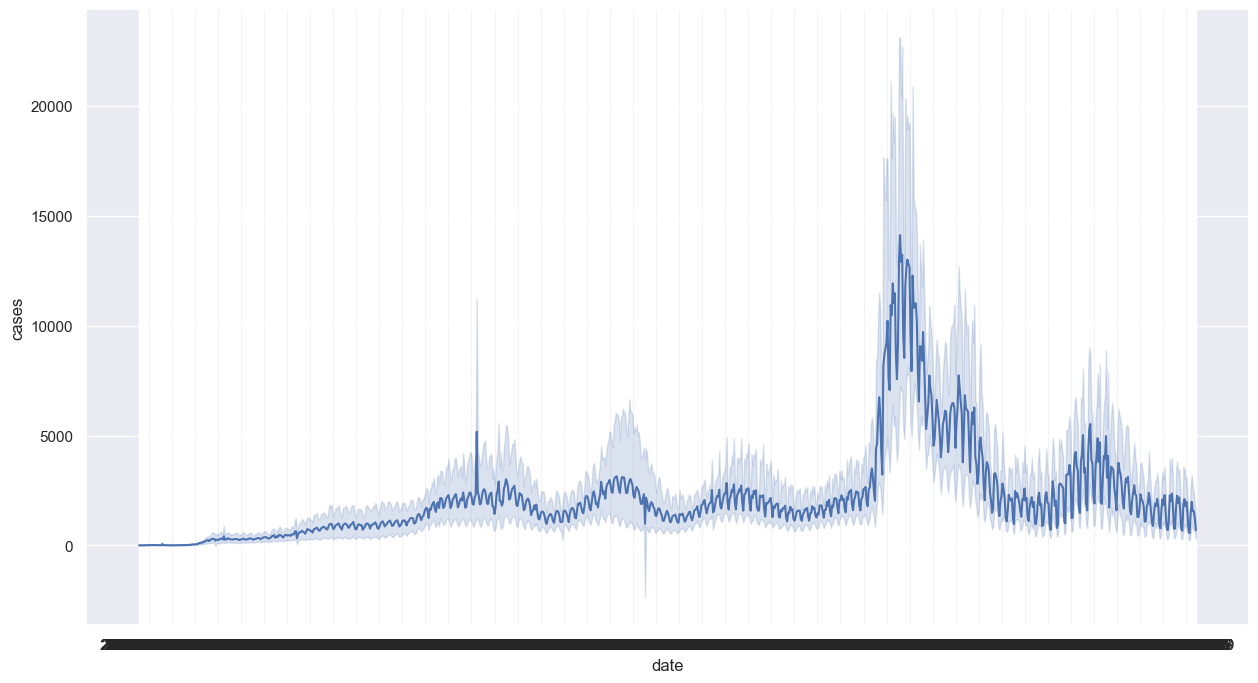

In [22]:
Germany_confirmed = df.query("type == 'confirmed'")
sns.set(rc={"figure.figsize":(15,8)}) 
sns.lineplot(x = "date", y = "cases", data = Germany_confirmed)

### 2.Berapa presentase jumlah kasus yang terkonfirmasi (confirmed) dari jumlah populasi pada negara tersebut di setiap tahun yang sama? Visualisasikan!

In [62]:
Germany_cases = Germany.groupby(["year","type"],as_index=False).agg({"cases":"mean", "population":"max"})
Germany_cases 

,year,type,cases,population
0,2020,confirmed,4984.744928,83783945.0
1,2020,death,95.857971,83783945.0
2,2020,recovery,3915.095652,83783945.0
3,2021,confirmed,14878.589041,83783945.0
4,2021,death,216.038356,83783945.0
5,2021,recovery,-3700.569863,83783945.0
6,2022,confirmed,94108.304636,83783945.0
7,2022,death,137.811258,83783945.0
8,2022,recovery,0.000000,83783945.0


In [63]:
Germany_cases ["percentase"]=Germany_cases["cases"]/Germany_cases["population"]*100

In [64]:
Germany_cases

,year,type,cases,population,percentase
0,2020,confirmed,4984.744928,83783945.0,0.005950
1,2020,death,95.857971,83783945.0,0.000114
2,2020,recovery,3915.095652,83783945.0,0.004673
3,2021,confirmed,14878.589041,83783945.0,0.017758
4,2021,death,216.038356,83783945.0,0.000258
5,2021,recovery,-3700.569863,83783945.0,-0.004417
6,2022,confirmed,94108.304636,83783945.0,0.112323
7,2022,death,137.811258,83783945.0,0.000164
8,2022,recovery,0.000000,83783945.0,0.000000


In [65]:
import plotly.express as px

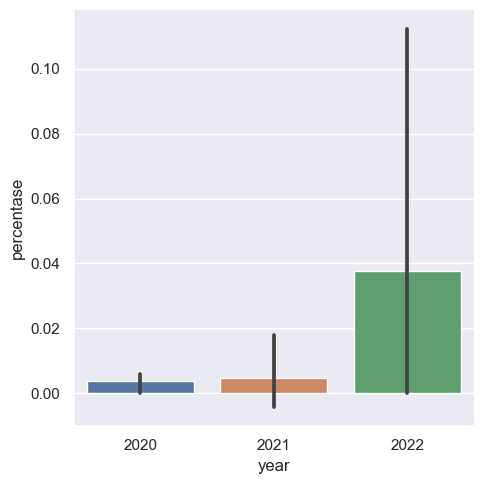

In [66]:
Germany_cases_confirmed_population = Germany_cases.query("type == 'confirmed'")


sns.catplot(x = "year", y = "percentase", data = Germany_cases, kind = "bar" )

plt.show()

### 3.Berapa presentase jumlah kasus kematian (death) dari jumlah kasus yang terkonfirmasi (confirmed) pada setiap tahunnya, dari 2020 hingga 2022? Visualisasikan!

In [67]:

death = Germany_cases.query("type == 'death'")
confirm = Germany_cases.query("type == 'confirmed'")

Germany_cases_confirmed_death =death.merge(confirm, on = "year", suffixes = ("_death", "_confirmed" ))

Germany_cases_confirmed_death ["death_p"] = Germany_cases_confirmed_death["cases_death"] / Germany_cases_confirmed_death ["cases_confirmed"] * 100

Germany_cases_confirmed_death

,year,type_death,cases_death,population_death,percentase_death,type_confirmed,cases_confirmed,population_confirmed,percentase_confirmed,death_p
0,2020,death,95.857971,83783945.0,0.000114,confirmed,4984.744928,83783945.0,0.005950,1.923027
1,2021,death,216.038356,83783945.0,0.000258,confirmed,14878.589041,83783945.0,0.017758,1.452008
2,2022,death,137.811258,83783945.0,0.000164,confirmed,94108.304636,83783945.0,0.112323,0.146439


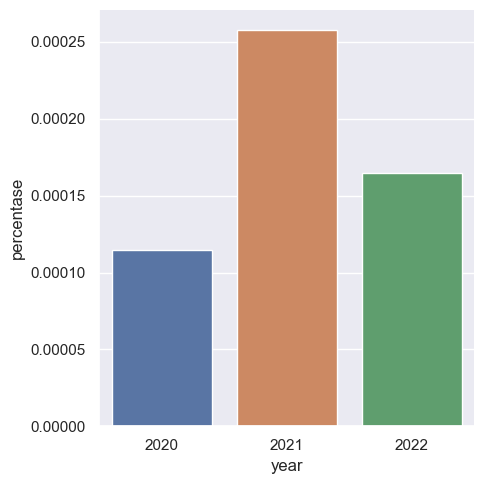

In [68]:
Germany_cases_confirmed_death = Germany_cases.query("type == 'death'")


sns.catplot(x = "year", y = "percentase", data = death, kind = "bar" )

plt.show()

### 4.Berapa presentase jumlah kasus yang sembuh ("recovery") dari jumlah kasus yang terkonfirmasi (confirmed) pada setiap tahunnya? Visualisasikan!

In [69]:
recovery = Germany_cases.query("type == 'recovery'")
confirm = Germany_cases.query("type == 'confirmed'")

Germany_cases_confirmed_recovery  =recovery.merge(confirm, on = "year", suffixes = ("_recovery", "_confirmed" ))

Germany_cases_confirmed_recovery

,year,type_recovery,cases_recovery,population_recovery,percentase_recovery,type_confirmed,cases_confirmed,population_confirmed,percentase_confirmed
0,2020,recovery,3915.095652,83783945.0,0.004673,confirmed,4984.744928,83783945.0,0.005950
1,2021,recovery,-3700.569863,83783945.0,-0.004417,confirmed,14878.589041,83783945.0,0.017758
2,2022,recovery,0.000000,83783945.0,0.000000,confirmed,94108.304636,83783945.0,0.112323


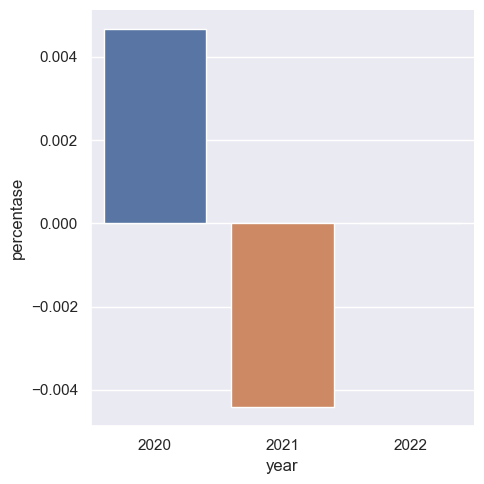

In [70]:
Germany_cases_confirmed_recovery = Germany_cases.query("type == 'recovery'")


sns.catplot(x = "year", y = "percentase", data = recovery, kind = "bar" )

plt.show()

In [71]:
Germany_cases_chart =px.area(Germany_cases,x="year",y="percentase",color="type",line_group="type", title = " the percentage of confirmed, recovered, and deceased cases from the total population in Germany")
Germany_cases_chart.show()

### 5.Kemudian, bandingkan antara presentase kasus kematian (point nomor 3) dengan presentase kasus yang sembuh (point nomor 4) dalam satu visualisasi.

In [72]:
Germany_recovery = Germany[Germany["type"] == "recovery"]
Germany_recovery

,date,country,type,cases,population,year
726616,2020-01-22,Germany,recovery,0,83783945.0,2020
726617,2020-01-23,Germany,recovery,0,83783945.0,2020
726618,2020-01-24,Germany,recovery,0,83783945.0,2020
726619,2020-01-25,Germany,recovery,0,83783945.0,2020
726620,2020-01-26,Germany,recovery,0,83783945.0,2020
...,...,...,...,...,...,...
727623,2022-10-25,Germany,recovery,0,83783945.0,2022
727624,2022-10-26,Germany,recovery,0,83783945.0,2022
727625,2022-10-27,Germany,recovery,0,83783945.0,2022
727626,2022-10-28,Germany,recovery,0,83783945.0,2022


In [73]:
Germany_recovery_confirmed = Germany_recovery.query("cases >= 0")
Germany_recovery_confirmed

,date,country,type,cases,population,year
726616,2020-01-22,Germany,recovery,0,83783945.0,2020
726617,2020-01-23,Germany,recovery,0,83783945.0,2020
726618,2020-01-24,Germany,recovery,0,83783945.0,2020
726619,2020-01-25,Germany,recovery,0,83783945.0,2020
726620,2020-01-26,Germany,recovery,0,83783945.0,2020
...,...,...,...,...,...,...
727623,2022-10-25,Germany,recovery,0,83783945.0,2022
727624,2022-10-26,Germany,recovery,0,83783945.0,2022
727625,2022-10-27,Germany,recovery,0,83783945.0,2022
727626,2022-10-28,Germany,recovery,0,83783945.0,2022


In [74]:
Germany_death = Germany[Germany["type"] == "death"]
Germany_death


,date,country,type,cases,population,year
449328,2020-01-22,Germany,death,0,83783945.0,2020
449329,2020-01-23,Germany,death,0,83783945.0,2020
449330,2020-01-24,Germany,death,0,83783945.0,2020
449331,2020-01-25,Germany,death,0,83783945.0,2020
449332,2020-01-26,Germany,death,0,83783945.0,2020
...,...,...,...,...,...,...
450335,2022-10-25,Germany,death,242,83783945.0,2022
450336,2022-10-26,Germany,death,196,83783945.0,2022
450337,2022-10-27,Germany,death,184,83783945.0,2022
450338,2022-10-28,Germany,death,167,83783945.0,2022


In [75]:
Germany_recovery_death = Germany.query("type == 'recovery' | type == 'death'") 
Germany_recovery_death = Germany_recovery_death.query("cases >= 0")


In [77]:
import plotly
import plotly.express as px


fig = px.area(Germany_recovery_death, x="date", y="cases", color="type", title = "Visualization of confirmed cases, death cases and recovered cases" )
fig.show()


<Axes: title={'center': 'Death'}, xlabel='date'>

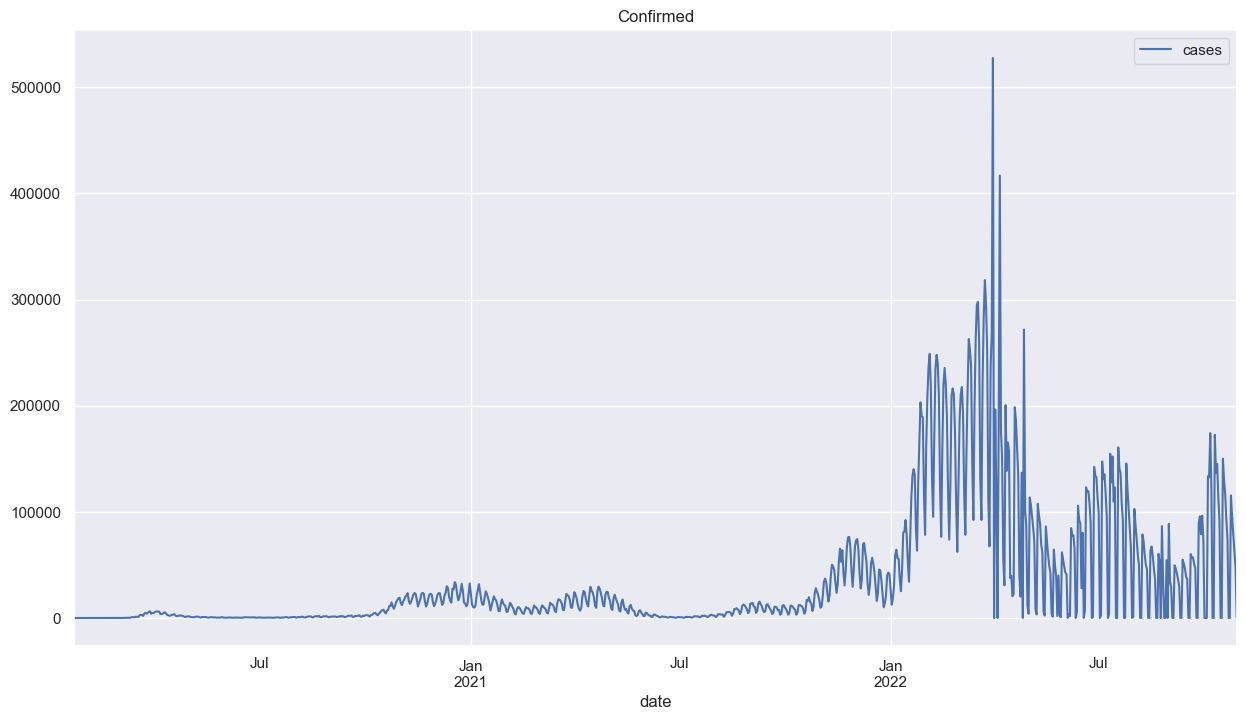

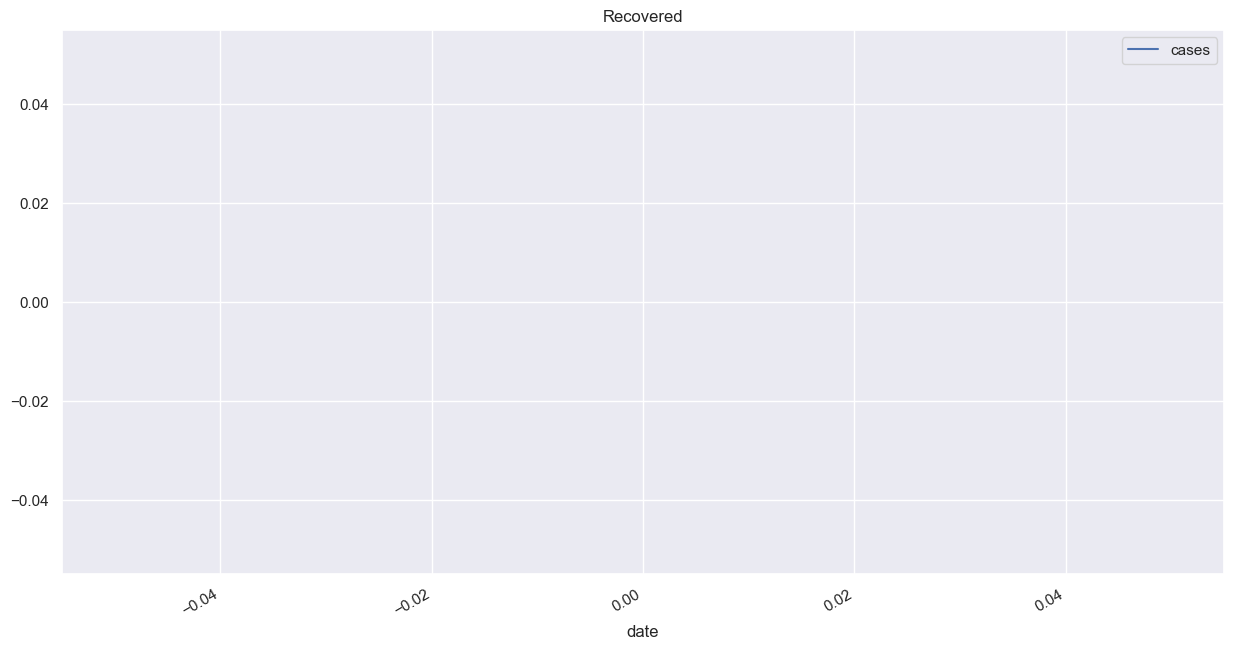

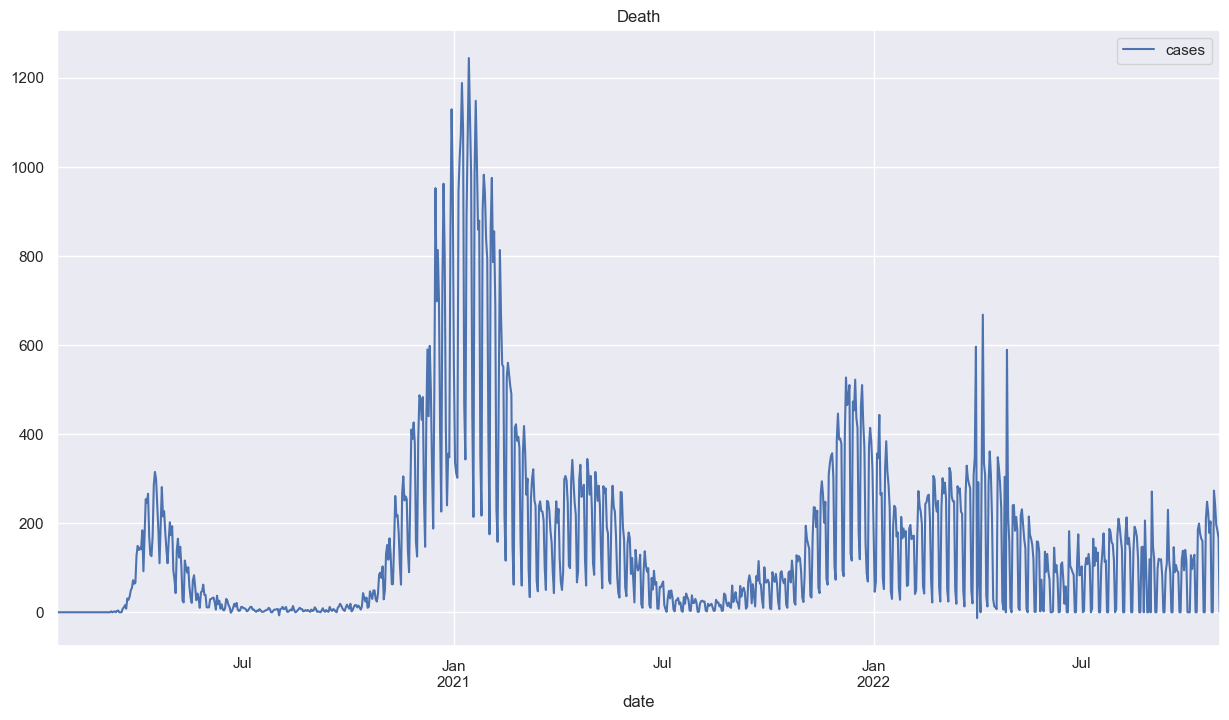

In [78]:
df_bersih.loc[(df_bersih['country']=='Germany') & (df_bersih['type']=='confirmed')].plot(x='date',y='cases', title='Confirmed')
df_bersih.loc[(df_bersih['country']=='Germany') & (df_bersih['type']=='recovered')].plot(x='date',y='cases', title='Recovered')
df_bersih.loc[(df_bersih['country']=='Germany') & (df_bersih['type']=='death')].plot(x='date',y='cases', title='Death')

### 6.Bandingkan jumlah perkembangan kasus Corona yang terkonfirmasi (confirmed) dari tahun ke tahun antara negara yang kalian pilih (Indonesia/Germany/india/US) dengan negara lain yang berada pada "continent" yang sama? Visualisasikan!

In [79]:
China = df_bersih[df_bersih["country"] == "China"]
China

,date,country,type,cases,population,year
2024,2020-01-22,China,confirmed,1,63240000.0,2020
2025,2020-01-23,China,confirmed,8,63240000.0,2020
2026,2020-01-24,China,confirmed,6,63240000.0,2020
2027,2020-01-25,China,confirmed,24,63240000.0,2020
2028,2020-01-26,China,confirmed,21,63240000.0,2020
...,...,...,...,...,...,...
660831,2022-10-25,China,recovery,0,57370000.0,2022
660832,2022-10-26,China,recovery,0,57370000.0,2022
660833,2022-10-27,China,recovery,0,57370000.0,2022
660834,2022-10-28,China,recovery,0,57370000.0,2022


In [80]:
China_confirmed = China[China["type"] == "confirmed"]
China_confirmed

,date,country,type,cases,population,year
2024,2020-01-22,China,confirmed,1,63240000.0,2020
2025,2020-01-23,China,confirmed,8,63240000.0,2020
2026,2020-01-24,China,confirmed,6,63240000.0,2020
2027,2020-01-25,China,confirmed,24,63240000.0,2020
2028,2020-01-26,China,confirmed,21,63240000.0,2020
...,...,...,...,...,...,...
92087,2022-10-25,China,confirmed,2,57370000.0,2022
92088,2022-10-26,China,confirmed,2,57370000.0,2022
92089,2022-10-27,China,confirmed,1,57370000.0,2022
92090,2022-10-28,China,confirmed,0,57370000.0,2022


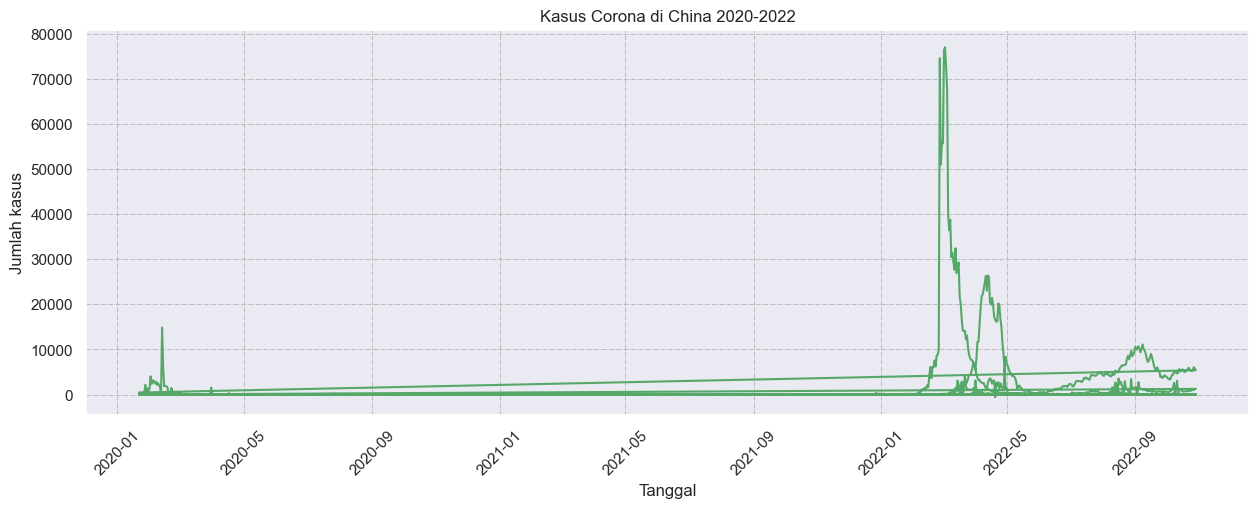

In [81]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(China_confirmed["date"], China_confirmed["cases"],
        color= 'g',     
        linestyle= '-') 

ax.set_xlabel("Tanggal") 
ax.set_ylabel("Jumlah kasus") 
ax.set_title("Kasus Corona di China 2020-2022")
plt.grid(color='darkgray', linestyle='-.', linewidth=0.5)
plt.xticks(rotation = 45)

plt.show()

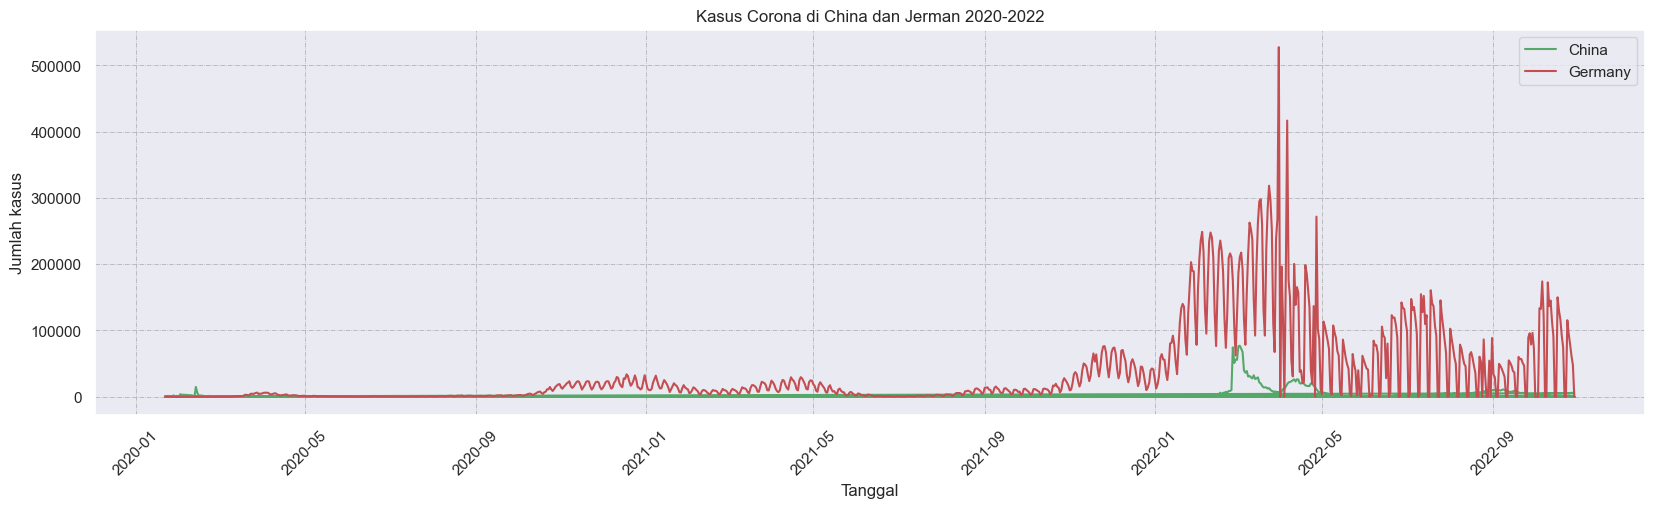

In [82]:
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(China_confirmed["date"], China_confirmed["cases"], color= 'g', linestyle= '-' , label="China") 
ax.plot(Germany_confirmed["date"], Germany_confirmed["cases"], color= 'r', linestyle= '-',label="Germany") 

ax.set_xlabel("Tanggal") 
ax.set_ylabel("Jumlah kasus") 
ax.set_title("Kasus Corona di China dan Jerman 2020-2022")

plt.grid(color='darkgray', linestyle='-.', linewidth=0.5)
plt.xticks(rotation = 45)
ax.legend()

plt.show()